# Problem Statement

*-by IYK professional school*

Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies in 2019, and insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall.

Auto Insurance company is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering CLV as a parameter to classify loyal customers.


# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df=pd.read_csv("data.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
print("The number of rows:",df.shape[0])
print("The number of columns:",df.shape[1])

The number of rows: 9134
The number of columns: 24


In [4]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [5]:
df.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [8]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [9]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

# Summary Statistics of Numerical features

In [10]:
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [11]:
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

There are no null values in the data

# Exploratory Data Analysis

## Numerical Features
### CLV - Target variable analysis

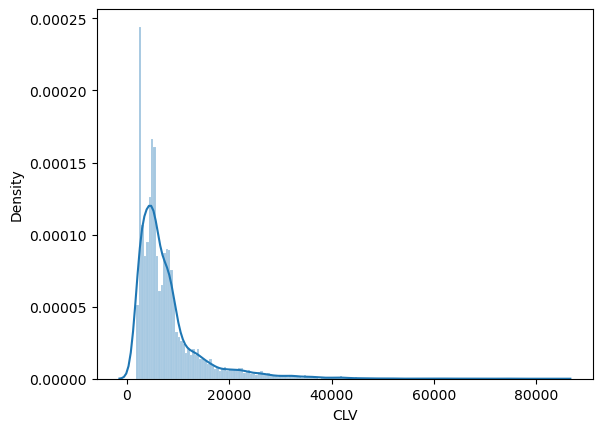

In [12]:
sns.histplot(df["CLV"], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4))
plt.savefig("CLV.png")
plt.show()

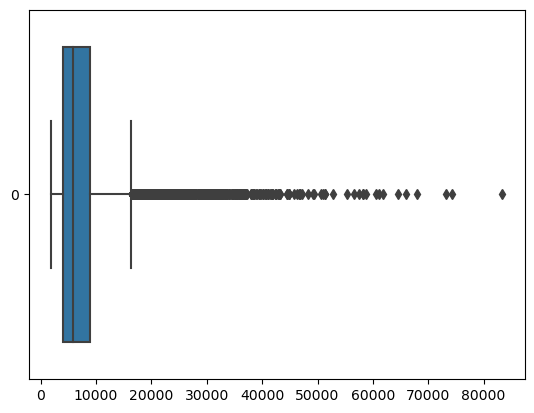

In [13]:
sns.boxplot(data=df["CLV"], orient='h')
plt.show()

In [14]:
df["CLV"].skew()

3.0322802599299847

From the distribution and box plot we can infer that CLV is highly right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.

## Income
### Univariate Analysis

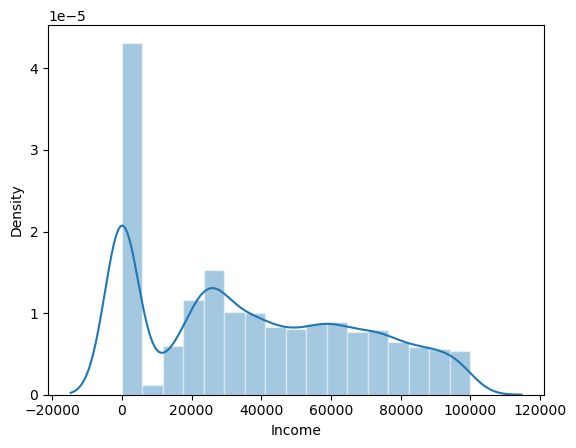

In [15]:
sns.histplot(df["Income"], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4))
plt.show()

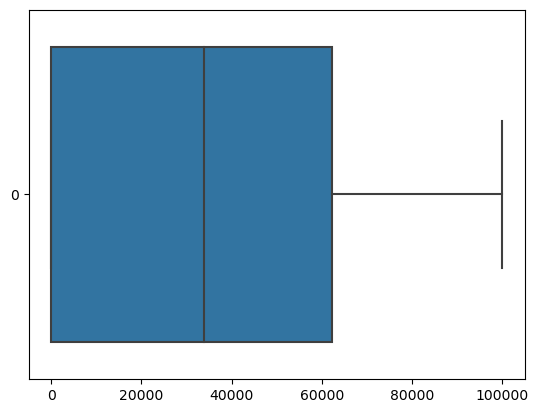

In [16]:
sns.boxplot(data=df["Income"],orient='h')
plt.show()

## Bivariate Analysis

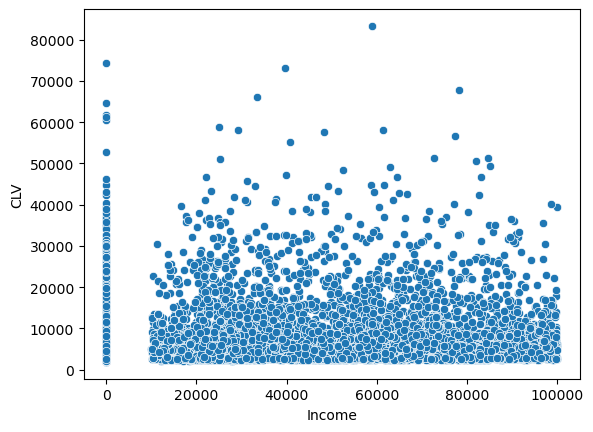

In [17]:
sns.scatterplot(data=df, x="Income", y="CLV")
plt.show()

There is no linear relationship between income and CLV

## Monthly Premium Auto

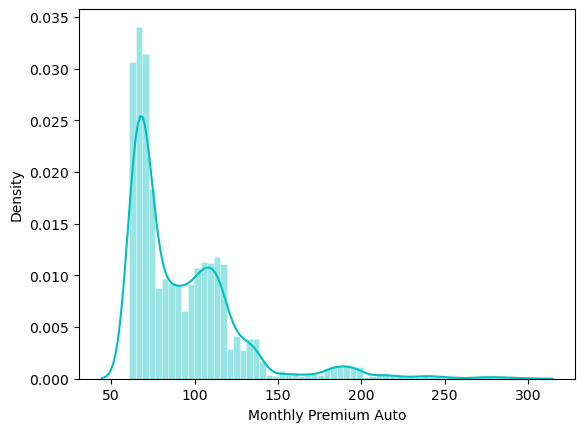

In [18]:
sns.histplot(df["Monthly Premium Auto"], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4),color='c')
plt.show()

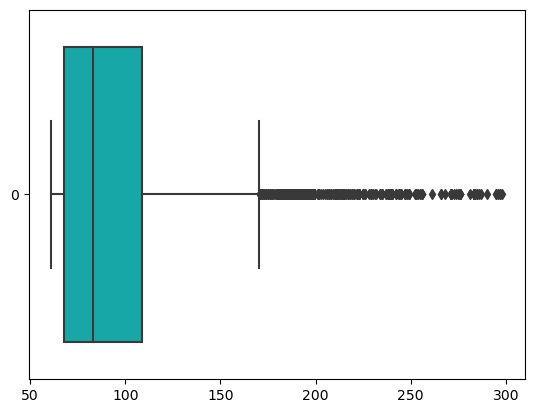

In [19]:
sns.boxplot(data=df["Monthly Premium Auto"],orient='h',color='c')
plt.show()

### Bivariate Analysis

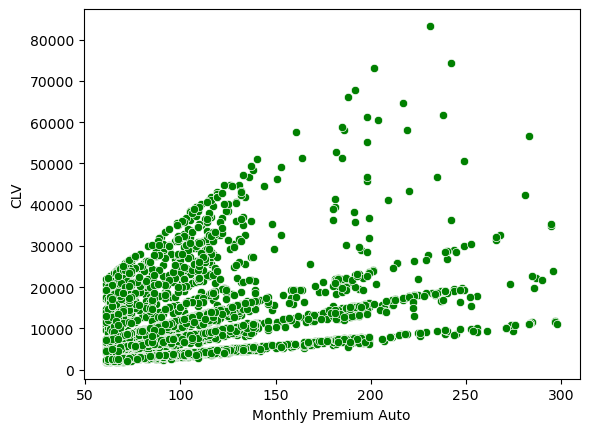

In [20]:
sns.scatterplot(data=df, x="Monthly Premium Auto", y="CLV",color='g')
plt.savefig("bi.png")
plt.show()

There is linear relationship between Monthly Premium Auto and CLV

## Months Since Last Claim

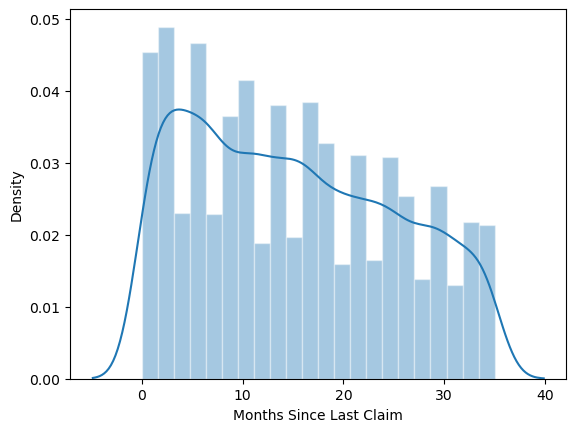

In [21]:
sns.histplot(df["Months Since Last Claim"], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4))
plt.show()

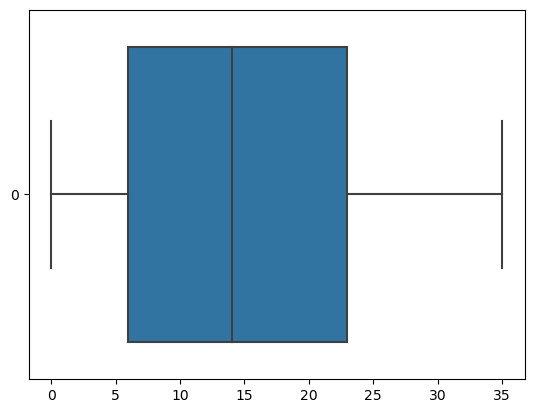

In [22]:
sns.boxplot(data=df["Months Since Last Claim"],orient='h')
plt.show()

### Bivariate analysis

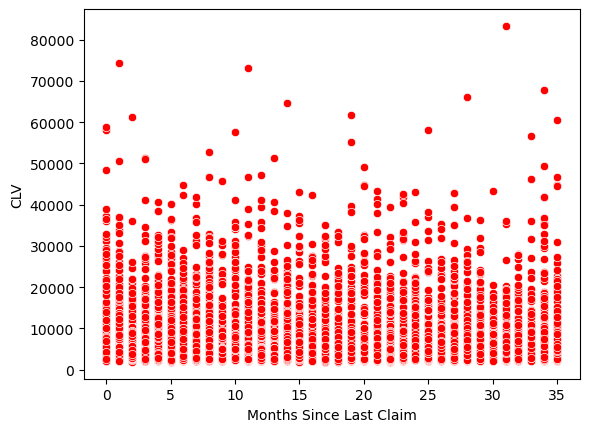

In [23]:
sns.scatterplot(data=df,x="Months Since Last Claim",y="CLV",color='r')
plt.show()

There is no linear relationship between Months Since Last Claim and CLV

## Months Since Policy Inception

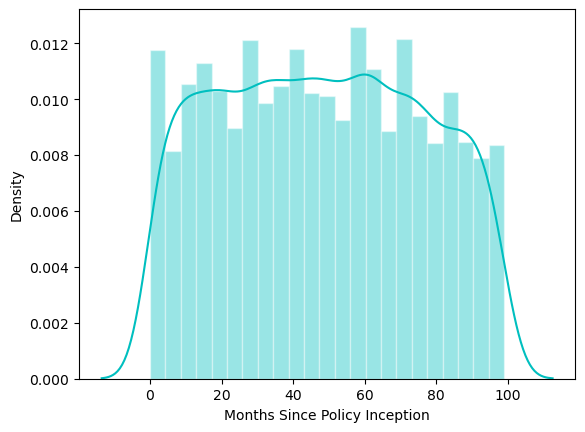

In [24]:
sns.histplot(df["Months Since Policy Inception"], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4), color='c')
plt.show()

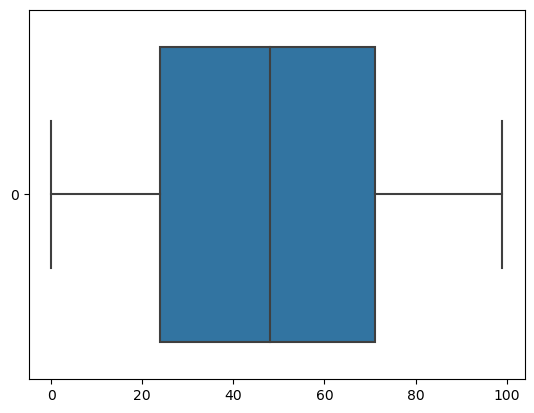

In [25]:
sns.boxplot(data=df["Months Since Policy Inception"],orient='h')
plt.show()

### Bivariate Analysis

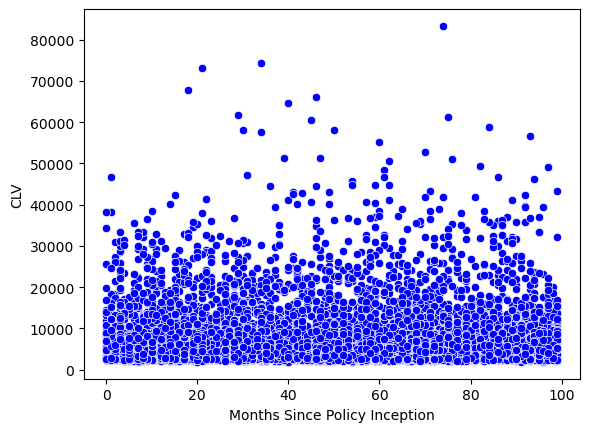

In [26]:
sns.scatterplot(data=df,x="Months Since Policy Inception", y="CLV", color='b')
plt.show()

There is no linear relationship between Months Since Policy Inception and CLV

## Total claim amount


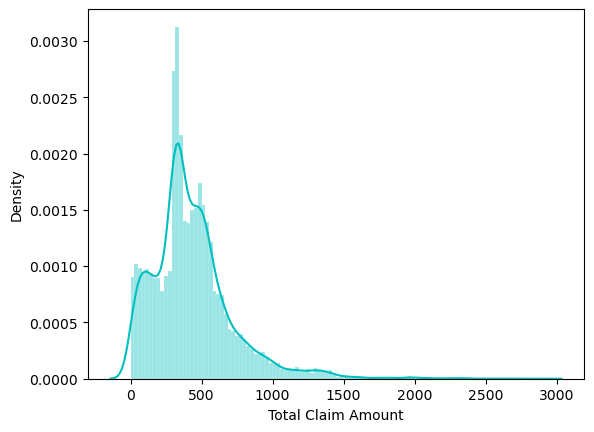

In [27]:
sns.histplot(df["Total Claim Amount"], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4), color='c')
plt.show()

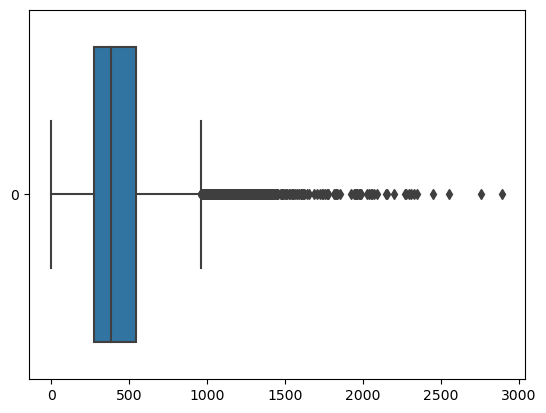

In [28]:
sns.boxplot(data=df["Total Claim Amount"],orient='h')
plt.show()

### Bivariate Analysis

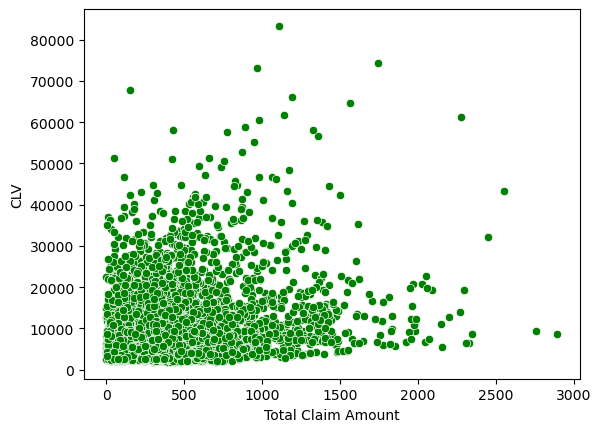

In [29]:
sns.scatterplot(data=df,x="Total Claim Amount",y="CLV",color='g')
plt.show()

There is a linear relationship between Total Claim Amount and CLV

The Monthly Premium Auto, Total Claim Amount and Income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)

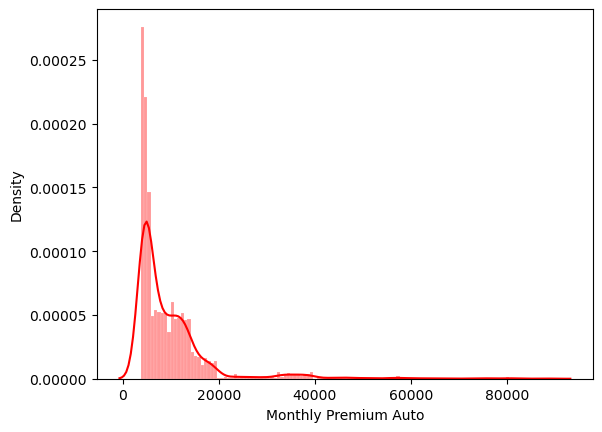

In [30]:
sns.histplot(np.square(df["Monthly Premium Auto"]), kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4), color='r')
plt.show()

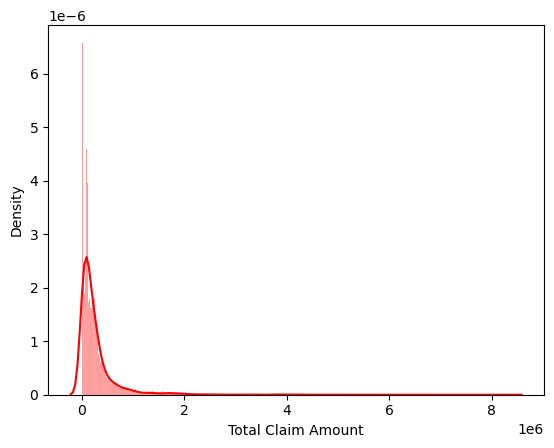

In [31]:
sns.histplot(np.square(df["Total Claim Amount"]), kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4), color='r')
plt.show()

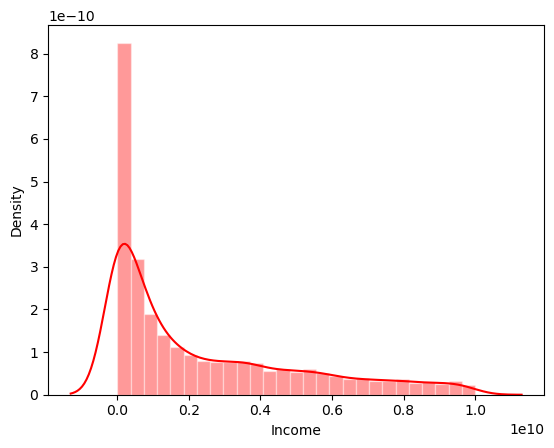

In [32]:
sns.histplot(np.square(df["Income"]), kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1,1,1,.4), color='r')
plt.show()

But as we can see that after the sqaure transformation the data is highly skewed, so we stick with the actual distribution again. We will just stick to the actual distribution of the feature in our model building.

## Categorical variables

In [33]:
cat_cols = df.select_dtypes(include="object")

In [34]:
no_col = df[["Number of Open Complaints","Number of Policies"]]

In [35]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [36]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/2011,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/2011,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/2011,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,2/3/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [37]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [38]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [39]:
for i in cat_cols:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-----------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-----------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-----------------------------------------
Unique values in Em

Customer column which is the id has unique values for all records so it can be removed for model building as it adds no significance

## State

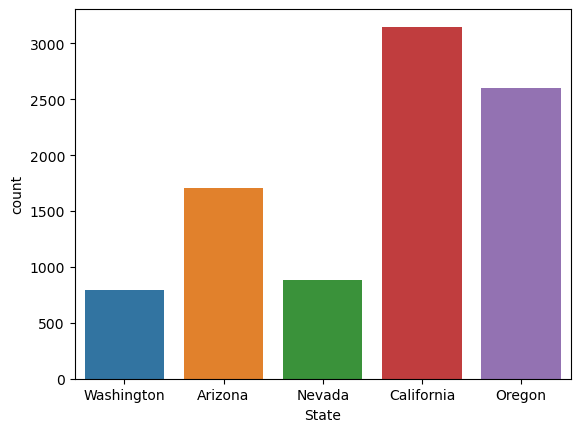

In [40]:
sns.countplot(data=df, x="State")
plt.show()

Most number of people are residing in california

## Response

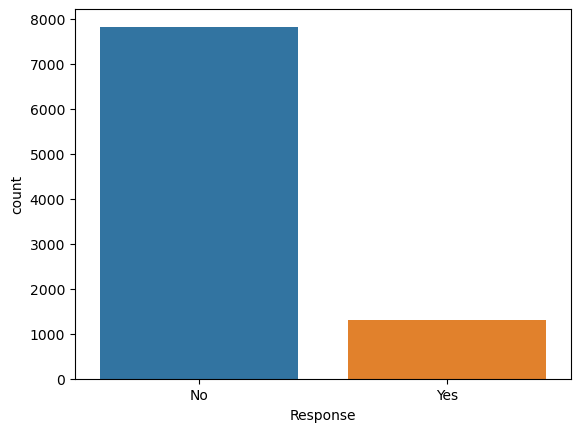

In [41]:
sns.countplot(data=df, x="Response")
plt.show()

Its seems that less than 1400 customers have responded to the marketing calls

## Coverage

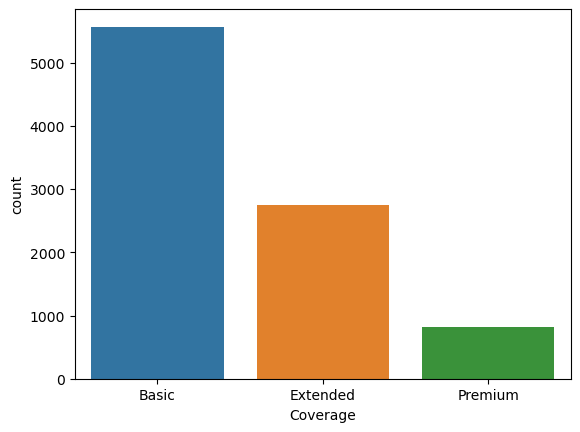

In [42]:
sns.countplot(data=df,x="Coverage")
plt.show()

Its seems that most people has coverage in Basic 

## Education

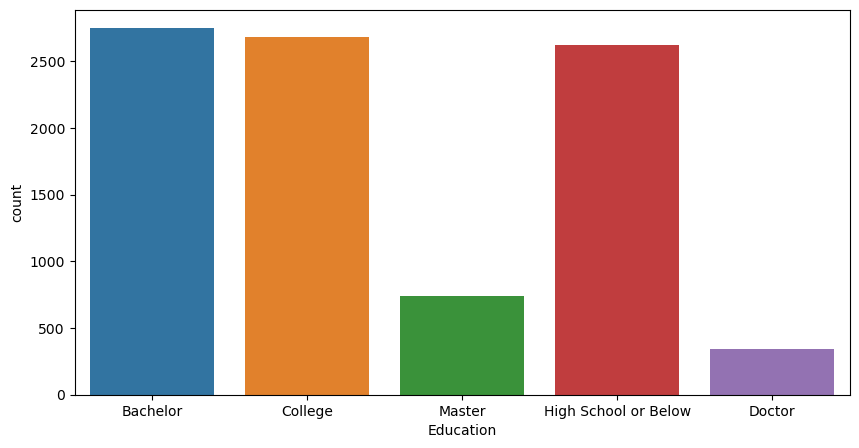

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Education")
plt.show()

## EmploymentStatus 

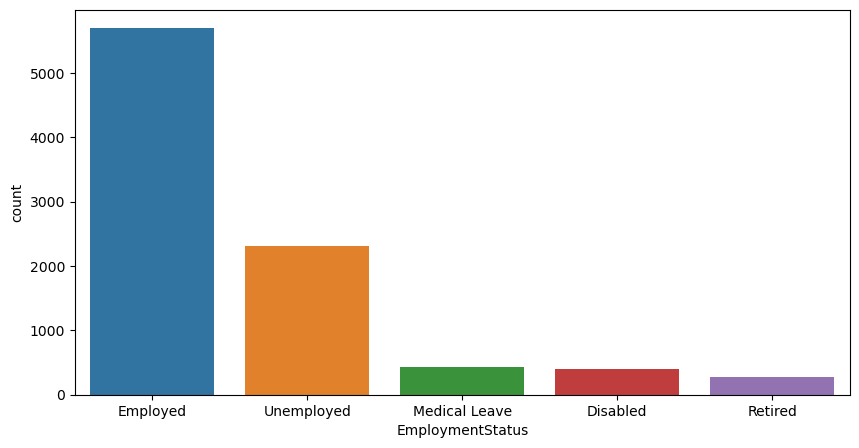

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="EmploymentStatus")
plt.show()

In [45]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

Around 62.38% of the customers are employed

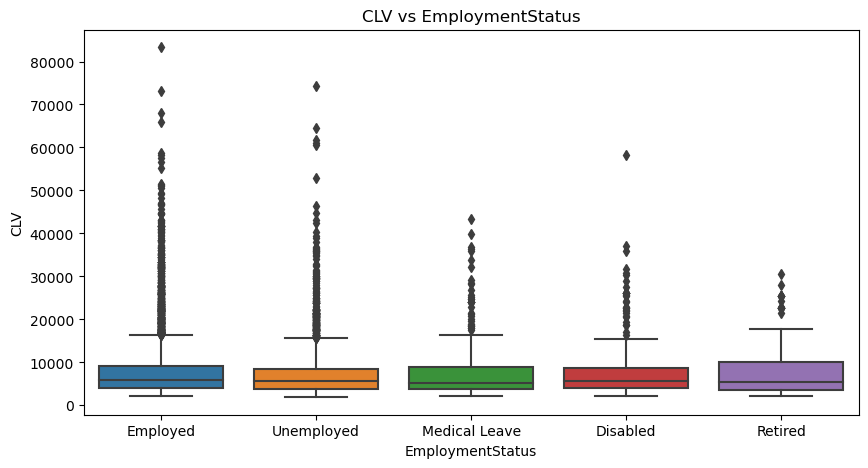

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['EmploymentStatus'],y=df['CLV'])
plt.title("CLV vs EmploymentStatus")
plt.savefig("bi1.png")
plt.show()

Its seem that CLV is more from employed people.

## Gender

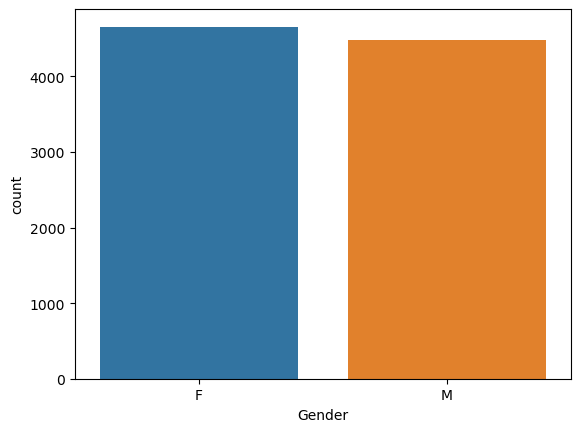

In [47]:
sns.countplot(data=df,x="Gender")
plt.show()

Gender column has almost equal distribution among Male and Female for all records so it can be removed for model building as it adds no significance

## Location Code

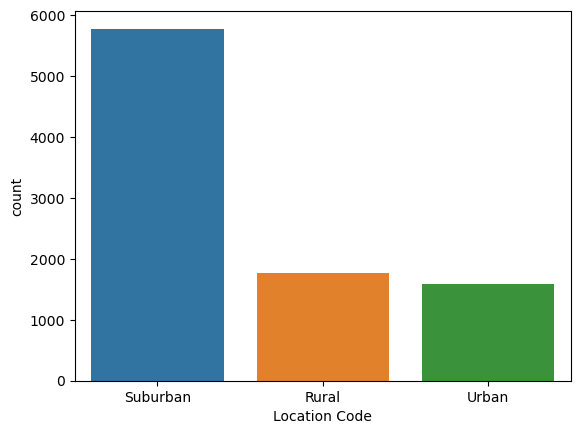

In [48]:
sns.countplot(data=df, x="Location Code")
plt.savefig("location.png")
plt.show()

Its seems that most people are located at Suburban

## Marital Status

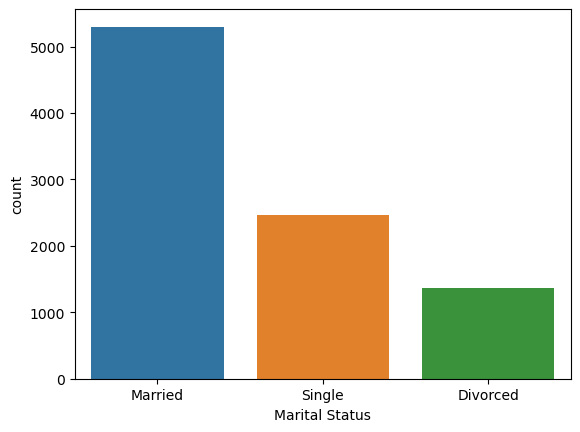

In [49]:
sns.countplot(data=df,x="Marital Status")
plt.show()

It seems that most people are married.

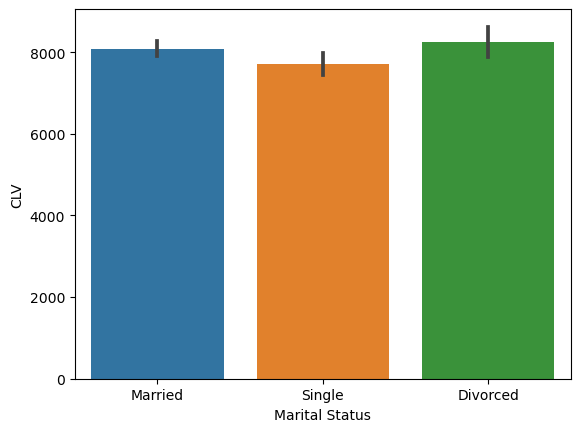

In [50]:
sns.barplot(data=df,x="Marital Status",y="CLV")
plt.show()

But as we most of the people are married it doesnt affecting the CLV.

## Policy Type

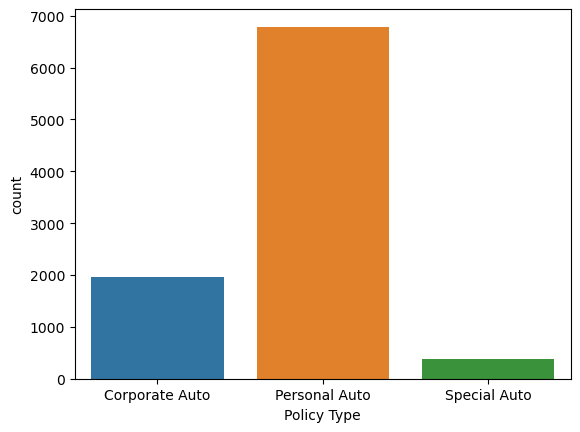

In [51]:
sns.countplot(data=df, x="Policy Type")
plt.show()

## Policy

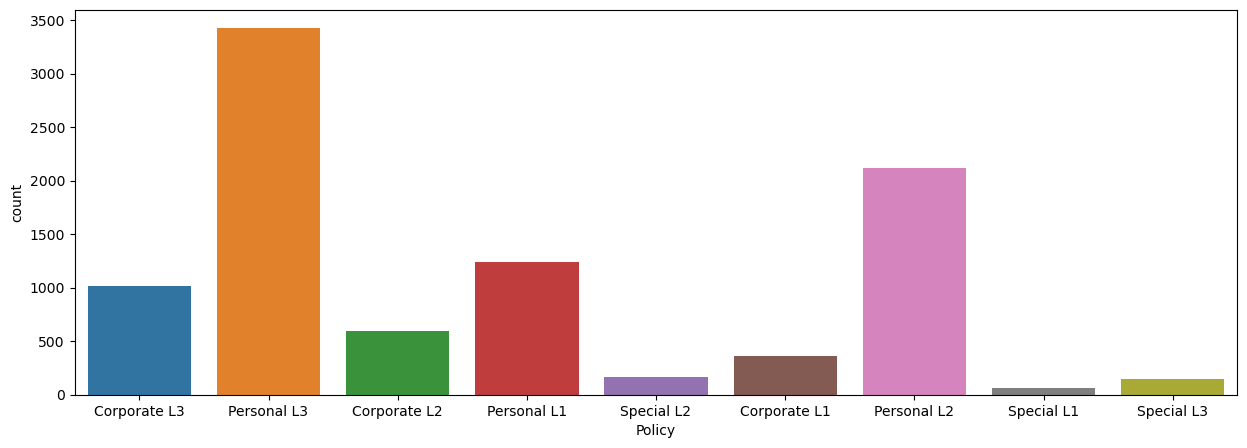

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x="Policy")
plt.show()

Personal L3 policy subcategory has the most number of customers.

## Renew Offer type

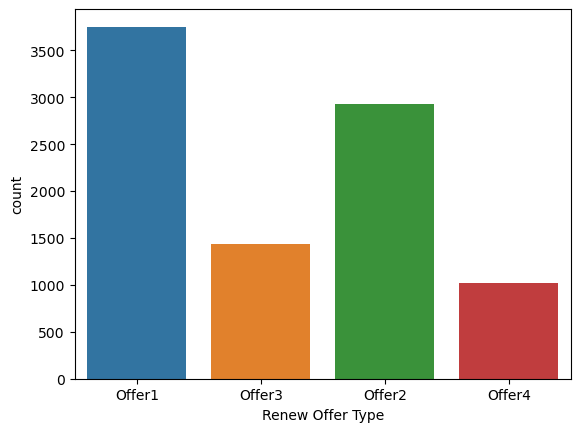

In [53]:
sns.countplot(data=df,x="Renew Offer Type")
plt.show()

## Sales Channel

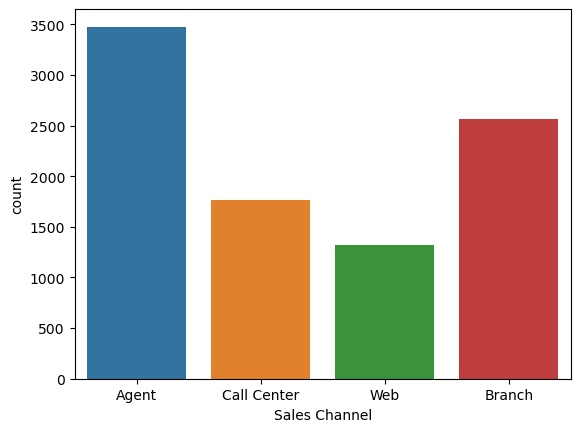

In [54]:
sns.countplot(data=df,x="Sales Channel")
plt.show()

## Vehicle Class

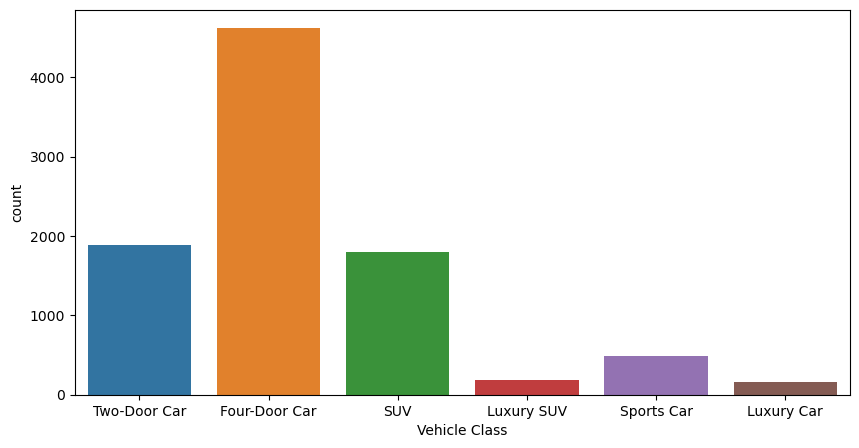

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Vehicle Class")
plt.show()

## Vehicle Size

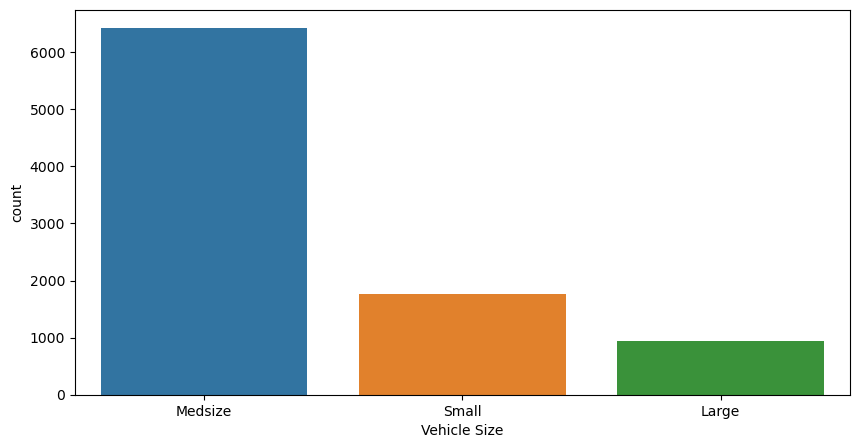

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Vehicle Size")
plt.show()

## Number of Open Complaints

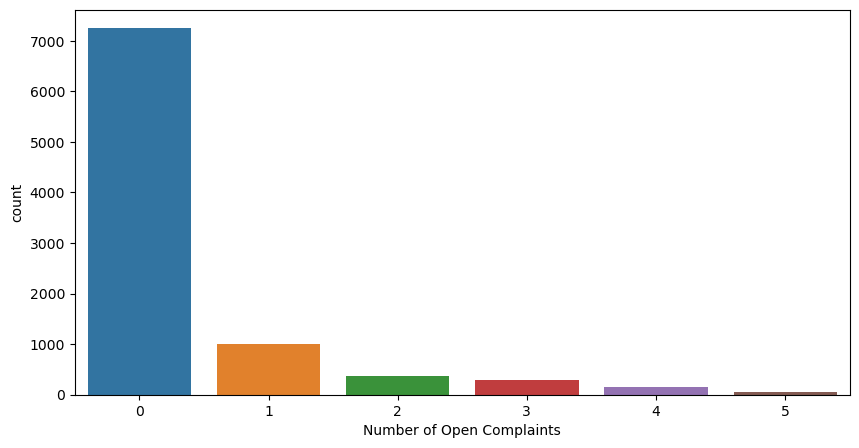

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Number of Open Complaints")
plt.show()

## Number of Policies

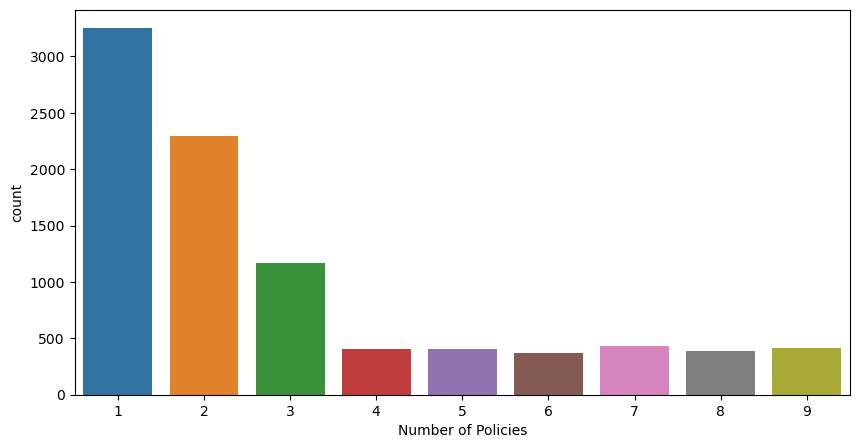

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Number of Policies")
plt.show()

In [59]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)

In [60]:
df["Months"] = df["Effective To Date"].dt.month

In [61]:
df['Months'] = df['Months'].astype('object')

## Months

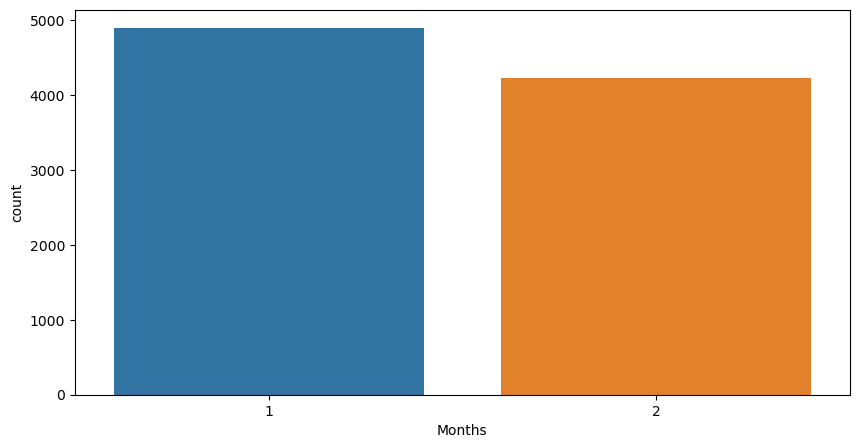

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Months")
plt.show()

In [63]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [64]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

# HeatMap

In [65]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

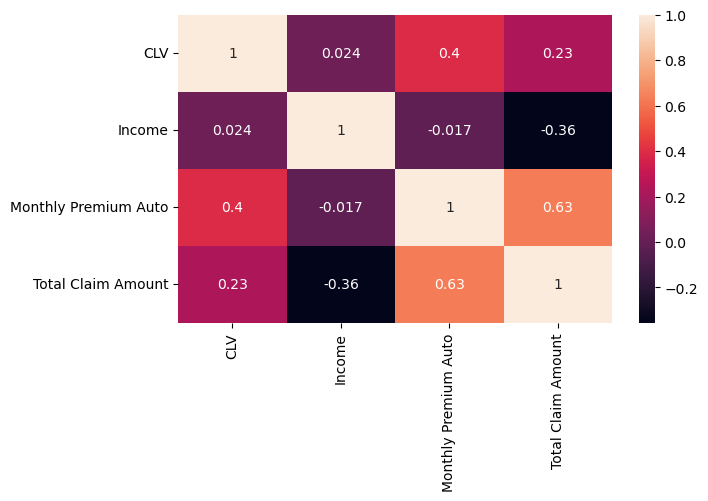

In [66]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.savefig("Heatmap.png")
plt.show()

We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.

# Data Preprocessing

In [67]:
cat_cols.drop("Customer",axis=1,inplace=True)

In [68]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [69]:
catg=pd.get_dummies(cat_cols,drop_first=True)

In [70]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [71]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=dfn['CLV']          
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [73]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 42)
(6393,)
(2741, 42)
(2741,)


# Model Building

## Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.26073373730563165
R^2 score for test: 0.25484160264997957


In [76]:
y_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [78]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.577231415348726
MAE 0.4455033282270872
R-squared: 0.25484160264997957


## Rigde and Lasso Regression

In [79]:
from sklearn.linear_model import Ridge, Lasso

In [80]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print('Ridge Regression with alpha=0.1')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression with alpha=0.1
RMSE: 0.5772298681232935
R-squared: 0.25484559732680356


In [81]:
ridge=Ridge(alpha=1)
ridge.fit(X_train,y_train)
print('Ridge Regression with alpha=1')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

Ridge Regression with alpha=1
RMSE: 0.5772172981328677
R-squared: 0.25487805053908263


In [82]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Lasso Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

Lasso Regression
RMSE: 0.5992937645386806
R-squared: 0.19679167777854611


## Decision Tree

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.2636910150910177
MAE 0.10343505564943467
R-squared: 0.8444967945595979


In [85]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(dfn['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

## RandomForest

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.1961521558772452
MAE 0.08885672071039409
R-squared: 0.9139531744119158


## Hyperparameter tuning of random forest

In [88]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

In [89]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.19730695033447554
MAE 0.08955875336878757
R-squared: 0.9129370357553862


In [90]:
from sklearn.ensemble import AdaBoostRegressor

In [91]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='mse'),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

C:\AnacondaJupiterNotebook\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\AnacondaJupiterNotebook\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\AnacondaJupiterNotebook\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\AnacondaJupiterNotebook\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\AnacondaJupiterNotebook\lib\site-packages\sklearn\ensemble\_forest.py:396: Future

AdaBoostRegressor(base_estimator=RandomForestRegressor(criterion='mse',
                                                       max_depth=5),
                  n_estimators=150)

In [92]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.21526067893206993
MAE 0.1281184650420203
R-squared: 0.8963717669770862


In [93]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)

,Score
Number of Policies,0.673312
Monthly Premium Auto,0.231204
Total Claim Amount,0.014499
Months Since Policy Inception,0.012729
Months Since Last Claim,0.012467
Income,0.012427
Number of Open Complaints,0.003314
Coverage_Extended,0.003053
EmploymentStatus_Employed,0.002768
Renew Offer Type_Offer2,0.001837


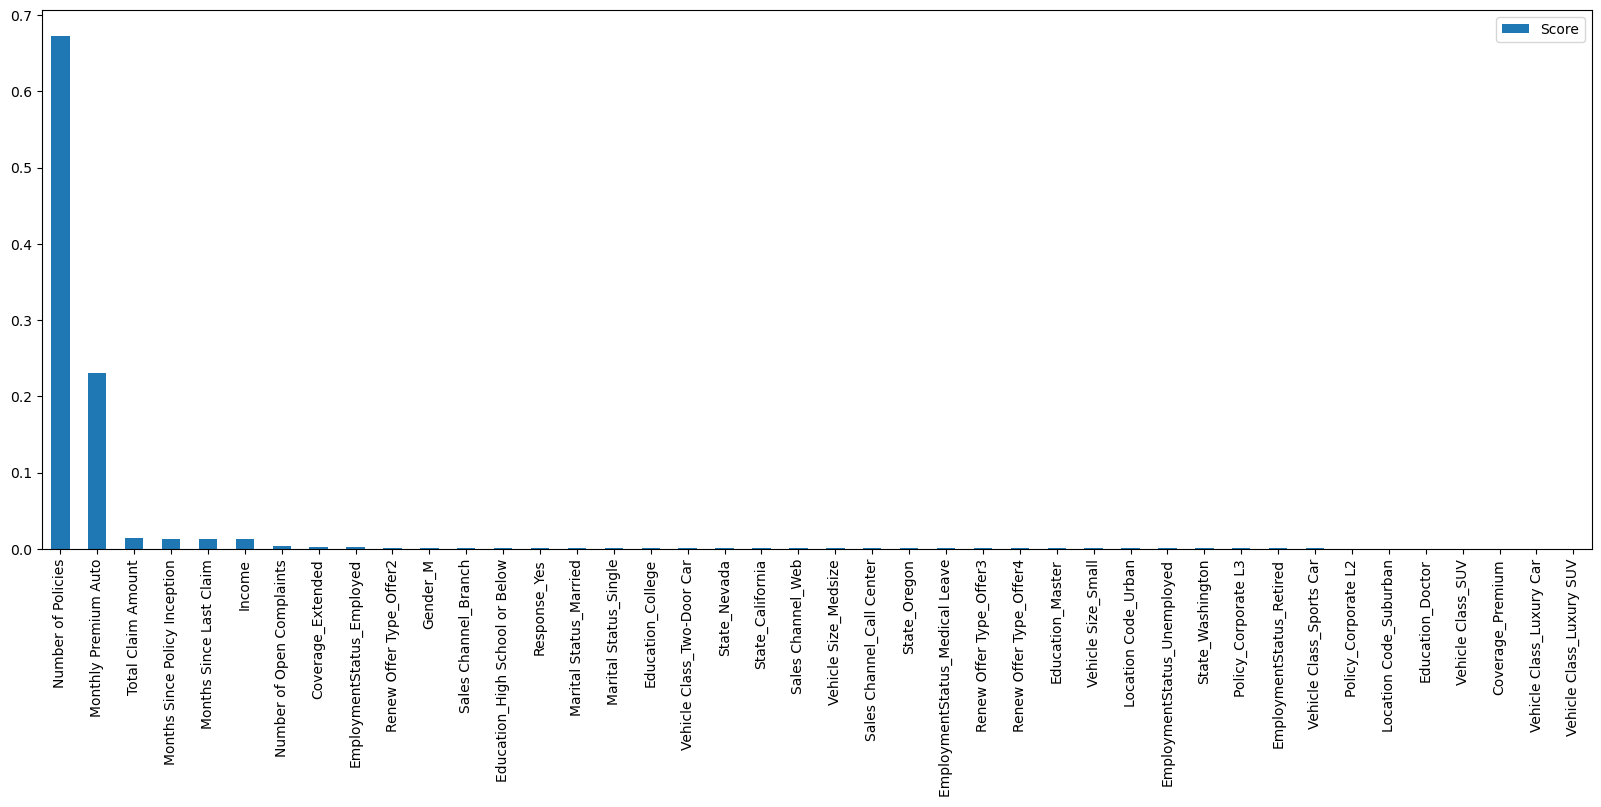

In [94]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

Random Forest Model with hyperparameter tuning using GridSearchCV gave the best RMSE and R^2 score

No of Policies and Monthly Premium are the most important features in predicting CLV

In [95]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(dfn['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [96]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [97]:
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [98]:
score1 = cross_val_score(best_xgb_model, X, y, cv=5, scoring='r2')
score1.mean()

0.895885232397457